In [1]:
# Datensatzverarbeitung (engl. dataset pipeline)
%pip install pandas
%pip install ipython
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Aufgabe 1: NLP-Techniken anwenden, um eine Textsammlung zu analysieren

## Datensatzverarbeitung (engl. dataset pipeline)

### Datensatzsichtung (engl. dataset inspection)
Die Datensatzsichtung untergliedert sich in Datenstrukturanalyse, Explorative Datenanalyse und die Datensatzaufbereitung.

#### Datenstrukturanalyse (engl. data structure analysis)
Die Stukturiertung des Datensatzes wird durch die Datenstrukturanalyse erkundet. Der Datensatz `complaints_data.csv` wird eingelesen und die Struktur der Daten untersucht. Es werden die ersten 10 Zeilen sowie die wichtigsten Metadaten (Spalten, Datentypen, Anzahl der Werte) angezeigt, um einen ersten Überblick über den Aufbau des Datensatzes zu erhalten.

In [2]:
# Datenstrukturanalyse (engl. data structure analysis)
print("=== Datenstrukturanalyse (engl. data structure analysis) ===")


import pandas as pd
from IPython.display import display

df1 = pd.read_csv('../datasets/complaints_data.csv')

print("--- Vorschau der ersten 10 Zeilen ---")
display(df1.head(10))

print("\n--- Übersicht der Datenstruktur ---")
df1.info()

=== Datenstrukturanalyse (engl. data structure analysis) ===
--- Vorschau der ersten 10 Zeilen ---


,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t..."



--- Übersicht der Datenstruktur ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     5659 non-null   object
 1   posted_on  5659 non-null   object
 2   rating     5659 non-null   int64 
 3   text       5629 non-null   object
dtypes: int64(1), object(3)
memory usage: 177.0+ KB


#### Explorative Datenanalyse (EDA)
Im Rahmen der EDA wird der Datensatz untersucht. Es werden stukturiert und unstrukturiert vorliegende Informationen für die weitere Verarbeitung identifiziert.

##### Analyse der strukturierten Daten (engl. analysis of structured data)
Analyse der strukturiert vorliegenden Daten aus den Spalten "author" "posted_on" und "rating".

###### Ortsdaten (engl. location data)

In [3]:
### Ortsdatenanalyse
import pandas as pd
df = pd.read_csv('../datasets/complaints_data.csv')

#### Extrahieren der Bundesstaaten aus der "author"-Spalte
df["state"] = df["author"].str.extract(r",\s*([A-Z]{2})\s*$", expand=False)                 # Spalte "state" für Visualisierung in Datennachverarbeitung

##### State-Codes: alle extrahierten (2 Großbuchstaben am Ende)
all_extracted = df["state"].dropna().unique()

##### gültige State-Codes: US-Bundesstaaten (50 Staaten + DC / 51 Referenz)
all_states_set = {
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA",
    "KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT",
    "VA","WA","WV","WI","WY","DC"
}
##### ungültige State-Codes
invalid_states = [s for s in all_extracted if s not in all_states_set]
print(f"Bundesstaaten ungültig: {len(invalid_states)} \n{sorted(invalid_states)}\n")

all_states = pd.Series(list(all_states_set))

valid_states_only = df["state"].dropna()
valid_states_only = valid_states_only[valid_states_only.isin(all_states_set)]

#### Verteilung der Beschwerden nach den Bundesstaaten
##### Bundesstaaten MIT Beschwerden
print(f"Bundesstaaten mit Beschwerden: {len(valid_states_only.value_counts())}")
for state, count in valid_states_only.value_counts().items():
    print(f"{state}: {count}")

##### Bundesstaaten OHNE Beschwerden
missing_states = all_states_set - set(valid_states_only.unique())
print(f"\nBundesstaaten ohne Beschwerden: {len(missing_states)}\n",
    sorted(missing_states), sep='')

### Kontrollrechnung (51 Bundesstaaten insgesamt)
print(f"\nKONTROLLE: {len(valid_states_only.value_counts())} + {len(missing_states)} = {len(valid_states_only.value_counts()) + len(missing_states)}")

Bundesstaaten ungültig: 3 
['BC', 'ON', 'PE']

Bundesstaaten mit Beschwerden: 46
FL: 778
CA: 554
GA: 414
IL: 378
PA: 326
NJ: 278
TX: 274
MI: 266
TN: 244
MD: 238
WA: 215
VA: 215
MA: 184
CO: 182
IN: 144
MN: 108
OR: 100
CT: 75
UT: 62
AL: 55
NH: 45
DC: 41
SC: 41
DE: 40
NM: 38
MS: 35
NY: 32
LA: 28
AZ: 22
WV: 21
KY: 21
AR: 19
VT: 12
OH: 12
MO: 12
WI: 9
ME: 7
NC: 7
NV: 5
KS: 4
ID: 2
ND: 2
HI: 2
AK: 1
WY: 1
NE: 1

Bundesstaaten ohne Beschwerden: 5
['IA', 'MT', 'OK', 'RI', 'SD']

KONTROLLE: 46 + 5 = 51


###### Zeitdaten (engl. time data)

In [4]:
# Zeitdatenanalyse
print("=== Zeitdatenanalyse ===\n")
import pandas as pd
df = pd.read_csv('../datasets/complaints_data.csv')
# 1. Datum konvertieren (Format: "Nov. 22, 2016")
df['date'] = pd.to_datetime(df['posted_on'], format='mixed')

## Zeitraum
print("*** Zeitraum ***")
print(f"Erstes Datum:   {df['date'].min().strftime('%Y-%m-%d')}")
print(f"Letztes Datum:  {df['date'].max().strftime('%Y-%m-%d')}")
total_days = (df['date'].max() - df['date'].min()).days
years = total_days // 365
remaining_days = total_days % 365
print(f"Zeitraum:       {years} Jahre, {remaining_days} Tage ({total_days} Tage)")

## Datum extrahieren
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['year_month'] = df['date'].dt.to_period('M')

# Monatskategorie für korrekte Sortierung
months_order = pd.date_range(start='2026-01-01', end='2026-12-01', freq='MS').strftime('%B').tolist()
df['month_name'] = pd.Categorical(df['month_name'], categories=months_order, ordered=True)

# DataFrame chronologisch sortieren
df = df.sort_values(['year', 'month']).reset_index(drop=True)

# Verteilung der Beschwerden
print("\n*** Verteilumng der Beschwerden ***")

## Verteilung pro Jahr
print("\nVerteilung pro Jahr:")
print(df['year'].value_counts().sort_index())

## Verteilung pro Monat
print("\nVerteilung pro Monat:")
print(df['month_name'].value_counts().sort_index())

## Verteilung pro Wochentag
print("\nVerteilung pro Wochentag:")
print(df['weekday'].value_counts())

=== Zeitdatenanalyse ===

*** Zeitraum ***
Erstes Datum:   2000-07-31
Letztes Datum:  2016-11-22
Zeitraum:       16 Jahre, 118 Tage (5958 Tage)

*** Verteilumng der Beschwerden ***

Verteilung pro Jahr:
year
2000       1
2001       2
2002       1
2003       6
2004      10
2006      34
2007     106
2008     441
2009     462
2010     415
2011     357
2012     418
2013     313
2014     770
2015    1477
2016     846
Name: count, dtype: int64

Verteilung pro Monat:
month_name
January      485
February     476
March        441
April        369
May          394
June         461
July         529
August       540
September    507
October      526
November     505
December     426
Name: count, dtype: int64

Verteilung pro Wochentag:
weekday
Wednesday    993
Tuesday      960
Thursday     861
Monday       820
Friday       802
Saturday     659
Sunday       564
Name: count, dtype: int64


###### Bewertungen (engl. rating data)

=== Bewertungsanalyse ===

*** Absolute Verteilung der Bewertungen ***

rating
1    3734
0    1560
2     260
3      54
5      32
4      19
Name: count, dtype: int64


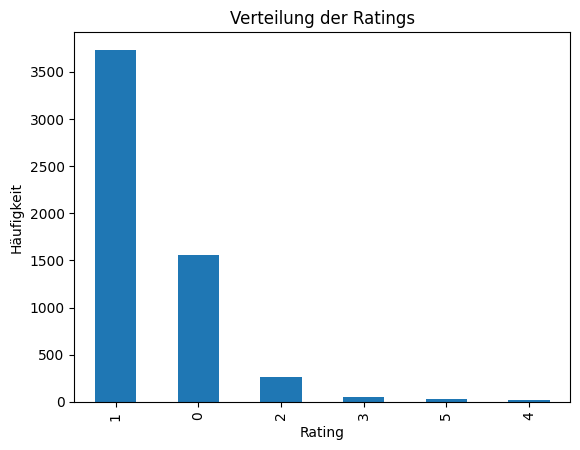

*** Relative Verteilung der Bewertungen ***

rating
1    65.98%
0    27.57%
2     4.59%
3     0.95%
5     0.57%
4     0.34%
Name: proportion, dtype: object


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/complaints_data.csv')
print("=== Bewertungsanalyse ===\n")

# Absolute Verteilung
print("*** Absolute Verteilung der Bewertungen ***\n")
verteilung = df['rating'].value_counts()
print(verteilung)

# Balkendiagramm der Verteilung
df['rating'].value_counts().plot(kind='bar')
plt.title('Verteilung der Ratings')
plt.xlabel('Rating')
plt.ylabel('Häufigkeit')
plt.show()

# Prozentuale Verteilung
print("*** Relative Verteilung der Bewertungen ***\n")
prozente = (df['rating'].value_counts(normalize=True) * 100).round(2).astype(str) + '%'
print(prozente)

##### Fehlwertanalyse (engl. missing value analysis)
Bei der Fehlwertanalyse werden leere Zellen (NaNs/NaTs) im Datensatz und fehlerhaft erhobene Daten identifiziert. ////// VORSICHT TEIL DER DATENSATZVALIDIERUNG

In [6]:
# Fehlwertanalyse (engl. missing value analysis)
print("=== Fehlwertanalyse (engl. missing value analysis) ===\n")
import pandas as pd
df = pd.read_csv('../datasets/complaints_data.csv')

# Fehlwerterfassung
## Fehlwerte in den strukturierte Daten
fehlende_author = df[df['author'].isna()]
fehlende_posted_on = df[df['posted_on'].isna()]
fehlende_rating = df[df['posted_on'].isna()]

## ungültige US-Bundesstaaten ['BC', 'ON', 'PE']
df["state"] = df["author"].str.extract(r",\s*([A-Z]{2})\s*$", expand=False)
all_states_set = {
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA",
    "KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT",
    "VA","WA","WV","WI","WY","DC"
}
invalid_states = df[~df["state"].isin(all_states_set) & df["state"].notna()]
## Fehlwerte ungültige Bundesstaaten
print("*** Fehlwerterfassung ungültige Bundesstaaten ***\n")
print(invalid_states[['author', 'text']].to_string(index=True, max_colwidth=100))

print(f"\n    Zeilen mit ungültigen US-Bundesstaaten: {len(invalid_states)}")

## Fehlwerte in den unstrukturierte Daten
fehlende_text = df[df['text'].isna()]

# Fehlwertausgabe
## Fehlwertausgabe stukturierte Daten
print("\n*** Fehlwerterfassung strukturierte Daten ***")
print(f"    Fehlwerte in 'author': {len(fehlende_author)}")
print(f"    Fehlwerte in 'posted_on': {len(fehlende_posted_on)}")
print(f"    Fehlwerte in 'rating': {len(fehlende_rating)}")
## Fehlwertausgabe unstukturierte Daten
print("\n*** Fehlwerterfassung unstrukturierte Daten ***")
print(f"    Fehlwerte in 'text': {len(fehlende_text)}")

=== Fehlwertanalyse (engl. missing value analysis) ===

*** Fehlwerterfassung ungültige Bundesstaaten ***

                            author                                                                                                 text
1586  Sylvain of San Francisco, BC  If you sign with Comcast, it is very likely you'll have to deal with their customer service - an...
2015        Joshua of Portland, ON  Most recently, Zach, Technician #** came out at my request and gave me a new X1 set top box and ...
3195         Susan of Broomall, PE  I tried calling Comcast to resolve an issue with my ON Demand, I waited almost an hour, was disc...

    Zeilen mit ungültigen US-Bundesstaaten: 3

*** Fehlwerterfassung strukturierte Daten ***
    Fehlwerte in 'author': 0
    Fehlwerte in 'posted_on': 0
    Fehlwerte in 'rating': 0

*** Fehlwerterfassung unstrukturierte Daten ***
    Fehlwerte in 'text': 30


##### Analyse der unstrukturierten Daten (engl. analysis of unstructured data)
Analyse der unstrukturiert vorliegenden Daten aus den Spalten "text".

###### Duplikaterkennung (engl. duplicate detection)

In [7]:
### Duplikaterkennung (engl. duplicate detection)
print("=== Duplikaterkennung (engl. duplicate detection) ===\n")

import pandas as pd

# Datensatz laden
df = pd.read_csv('../datasets/complaints_data.csv')

duplikate = df[df.duplicated(keep=False)]

### Duplikate nach Zeilen
print("*** Duplikate pro Zeile ***")
print(f"Gesamtzeilen:                    {len(df):,}")
print(f"Doppelte Gesamtzeilen:           {df.duplicated().sum():,}")
print(f"Duplikat-Anteil:                 {(df.duplicated().sum() / len(df) * 100):.2} %")
print()

### Duplikate darstellen
print("*** Darstellung: Duplikate pro Zeile ***\n")
pd.set_option('display.max_colwidth', None)  # Unbegrenzte Breite
pd.set_option('display.width', 500)          # Gesamtbreite erhöhen
print(df[df.duplicated(keep=False)])

print(f"\nAnzahl doppelter Zeilen: {len(duplikate)}")

### Duplikate nach Spalten
print("\n*** Duplikate pro Spalte ***")
print(f"Doppelte author-Spalten:         {df.duplicated(subset=['author']).sum():,}")
print(f"Doppelte text-Spalten:           {df.duplicated(subset=['text']).sum():,}")
print()

### Duplikate nach Spalte "text
print("*** Duplikate nach Spalte 'text' ***\n")
duplikate_text = df[df.duplicated(subset=['text'], keep=False)]
print(duplikate_text)
print(f"\nAnzahl doppelter text-Zeilen: {len(duplikate_text)}")

=== Duplikaterkennung (engl. duplicate detection) ===

*** Duplikate pro Zeile ***
Gesamtzeilen:                    5,659
Doppelte Gesamtzeilen:           1
Duplikat-Anteil:                 0.018 %

*** Darstellung: Duplikate pro Zeile ***

                          author     posted_on  rating                                                                                                                                                                                                                                                                                                                                                                                                                                          text
1397  Jennifer of Wheatridge, CO  Nov. 2, 2016       1  The services provided by Comcast are ridiculous. You pay lots of money for no adequate service. Everything keeps dropping from the cable to the internet to the phone on important calls. It takes hours to get the custom

###### Textlängenanalyse (engl. text length analysis)
Bei der Textlängenanalyse werden die Längen der Bewertungen und ihrer Sätze anhand der Zeichenanzahl durchgeführt.

####### Beschwerdelängenanalyse (engl. complaint length analysis)

In [8]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Datensatz laden
df3 = pd.read_csv('../datasets/complaints_data.csv')

print("=== Textlängenanalyse (engl. text length analysis) ===\n")


=== Textlängenanalyse (engl. text length analysis) ===



####### Satzlängenanalyse (engl. sentence length analysis)

=== Textlängenanalyse (engl. text length analysis) ===

*** Satzlängenanalyse (engl. sentence length analysis) ***

Sätze in 'text': 86278 (über 5659 Zeilen)

*** Satz-Statistiken ***
count    5659.00
mean       15.25
std        26.89
min         0.00
25%         7.00
50%        11.00
75%        18.00
max      1706.00
Name: saetze, dtype: float64
*** Satzzahlen in Prozent im Datensatz ***

  Bin  Anzahl Prozent
    0      30   0.53%
  1-2     131   2.31%
  3-4     441   7.79%
  5-9    1698  30.01%
10-19    2111   37.3%
20-29     713   12.6%
30-49     398   7.03%
50-99     116   2.05%
 100+      20   0.35%



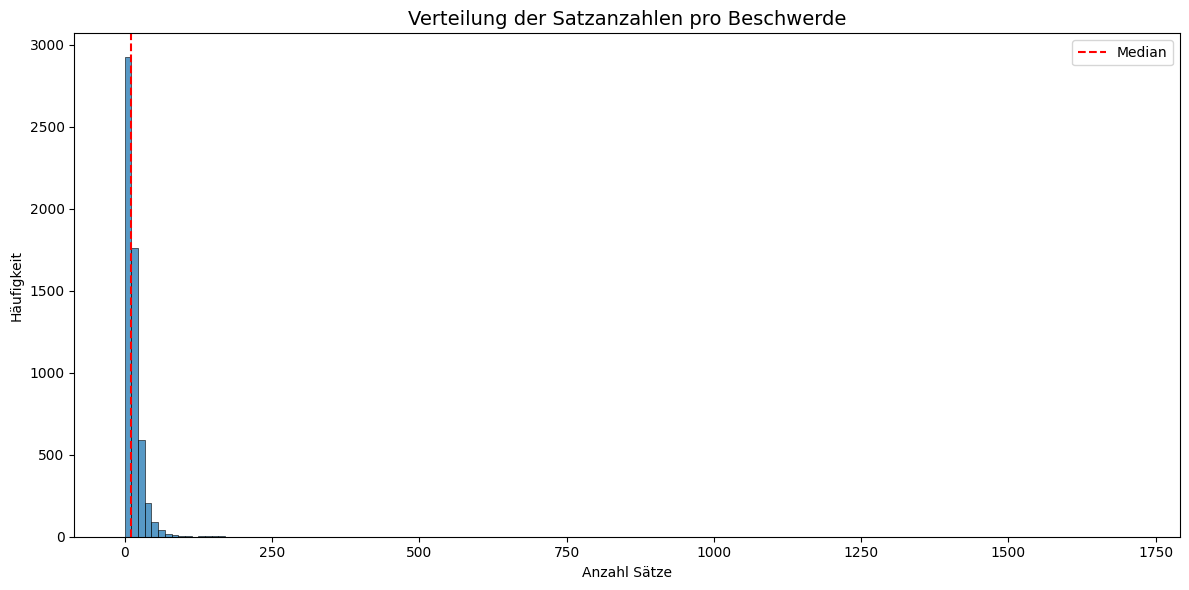

=== Längste 5 Bewertungen ===

Indizes: [5237, 5386, 5362, 5465, 5358]
      text_length  saetze                                                                                                                                                                                                                                                               text
5237        93136    1706  Channel 65 did not work since about August 1, 2008 on all non-cable box TVs\nLow or no signals since September 15, 2008.\nTechnicians at house about once a week since October 1, 2008.\nSpecific Dates\nIn October, a technician came to the house and put am...
5386        26593     357      As a Taxpaying, American Combat Veteran, I will swear under oath this is a true story & the story before you has been condensed believe it or not.  Today is 07/30/08 and I have been a Comcast customer for 10 years plus.   A couple of weeks before our...
5362        24039     289            I originally signed up with Adelphia 

In [9]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Datensatz laden
df3 = pd.read_csv('../datasets/complaints_data.csv')

print("=== Textlängenanalyse (engl. text length analysis) ===\n")

print("*** Satzlängenanalyse (engl. sentence length analysis) ***\n")
def saetze_pandas(df, spalten_name):  # <- df als Parameter!
    """Zählt Sätze in angegebener Spalte mit Pandas."""
    # Explizite Konvertierung zu String und Behandlung von NaNs
    df[spalten_name] = df[spalten_name].astype(str).replace('nan', '')
    
    # Sätze zählen pro Zelle
    df['saetze'] = df[spalten_name].apply(
        lambda x: len([s for s in re.split(r'[.!?]+', str(x)) if s.strip()])
    )
    
    gesamt = df['saetze'].sum()
    print(f"Sätze in '{spalten_name}': {gesamt} (über {len(df)} Zeilen)")
    return gesamt

# Verwendung mit df3
saetze_pandas(df3, 'text')

# Satz-Statistik
# Sicherstellen, dass NaNs behandelt werden, bevor astype(str) angewendet wird
# Wenn astype(str) auf NaN angewendet wird, entsteht "nan", was okay ist, aber
# falls re.split probleme mit float Inputs hat (was hier der Fall scheint für bestimmte Pandas Versionen)
# sicherstellen, dass Apply wirklich Strings bekommt.

df3['saetze'] = df3['text'].fillna('').astype(str).apply(
    lambda x: len([s for s in re.split(r'[.!?]+', x) if s.strip()])
)

print("\n*** Satz-Statistiken ***")
print(df3['saetze'].describe().round(2))

# Satzlängen-Berechnung
total_valid = df3['saetze'].count()  # Anzahl gültiger Satz-Zählungen

## Definieren der Bins und Labels für Satzzahlen
bins = [0, 1, 3, 5, 10, 20, 30, 50, 100, 1000]  # Angepasst an typische Satzzahlen
labels = ['0', '1-2', '3-4', '5-9', '10-19', 
          '20-29', '30-49', '50-99', '100+']

df3['saetze_bin'] = pd.cut(df3['saetze'], bins=bins, labels=labels, right=False)

## Tabelle mit Häufigkeiten und Prozenten
print("*** Satzzahlen in Prozent im Datensatz ***\n")

result = df3['saetze_bin'].value_counts().sort_index().reset_index()
result.columns = ['Bin', 'Anzahl']
result['Prozent'] = (result['Anzahl'] / total_valid * 100).round(2)
result['Prozent'] = result['Prozent'].astype(str) + '%'
print(result.to_string(index=False))
print()

# Histogramm für Sätze
plt.figure(figsize=(12, 6))
sns.histplot(data=df3, x='saetze', bins=150)
plt.axvline(df3['saetze'].median(), color='red', linestyle='--', label='Median')
plt.title('Verteilung der Satzanzahlen pro Beschwerde', fontsize=14)
plt.xlabel('Anzahl Sätze')
plt.ylabel('Häufigkeit')
plt.legend()
plt.tight_layout()
plt.show()

# Textlänge berechnen
df3['text_length'] = df3['text'].astype(str).str.len()

# Die längsten 5 Bewertungen nach text_length finden
laengste_indices = df3.nlargest(5, 'text_length').index.tolist()

print("=== Längste 5 Bewertungen ===\n")
print(f"Indizes: {laengste_indices}")

# Ausgabe der längsten 5 Bewertungen
top_5 = df3.loc[laengste_indices][['text_length', 'saetze', 'text']].copy()
top_5['text'] = top_5['text'].str[:250] + "..."
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 500)
print(top_5.round(0))

print("\n=== Längste Bewertung ===\n")
# Längste Bewertung mit Zeilenumbrüchen ausgeben
def text_mit_umbruechen(text, max_zeichen=300):
    """Text in Zeilen mit max_zeichen aufteilen"""
    words = str(text).split()
    lines = []
    current_line = ""
    
    for word in words:
        if len(current_line) + len(word) + 1 <= max_zeichen:
            current_line += word + " "
        else:
            lines.append(current_line.strip())
            current_line = word + " "
    if current_line:
        lines.append(current_line.strip())
    return '\n'.join(lines)

# Anwenden auf Zeile 5237
text_5237 = text_mit_umbruechen(df3.loc[5237, 'text'])
print(text_5237)

### Datensatzaufbereitung (engl. dataset preparation)
In der Datensatzaufbereitung erfolgen Datensatzbereinigung und Datensatzvalidierung welche den Datensatz für die den Anwendungsfall, sprich die Modellbildung vorbereiten. Hierbei werden die in der EDA gewonnenen Erkenntnisse genutzt, um diejenigen Datenzu bestimmen, die weiter verarbeitet werden.
### Datensatzbereinigung (engl. dataset cleaning)

In [10]:
# Datensatzbereinigung (engl. dataset cleaning)
import pandas as pd

df1 = pd.read_csv('../datasets/complaints_data.csv') # Referenzdatensatz
df2 = pd.read_csv('../datasets/complaints_data.csv') # zu bereinigender Datensatz

#### Fehlwertbehandlung (engl. missing value handling)
Die Behandlung von Fehlwerten wie NaNs (Not a Number) oder NaTs (Not a Text) kann durch listenweisen Fallausschluss, durch welchen Zeilen ohne Text oder Text unter einer Mindestlänge entfernt wird oder Imputation, das Auffüllen oder Ersetzen fehlender oder unvollständiger Textelemente durch geschätzte Werte, damit der Datensatz für Modelltraining oder Analyse vollständig nutzbar bleibt.

In [11]:
df2 = pd.read_csv('../datasets/complaints_data.csv') # zu bereinigender Datensatz
print("Fehlwertbehandlung (engl. missing value handling)\n")
### NaT-handling
nat_texts = df2['text'].isna().sum()
print(f"NaTs entfernt:                {nat_texts}\n")
fehlende_texte = df2[df2['text'].isna()]
print(f"Zeilenindizes:                {fehlende_texte.index.tolist()}")

Fehlwertbehandlung (engl. missing value handling)

NaTs entfernt:                30

Zeilenindizes:                [1321, 1322, 1323, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 5613, 5614, 5615, 5617, 5618, 5619, 5620, 5621, 5623, 5624, 5625, 5626, 5630, 5634, 5636, 5637, 5638, 5639, 5640]


#### Duplikatentfernung (engl. duplicate removal)
Durch die Duplikatentfernung werden doppelte Zeilen im Datensatz entfernt, um Verzerrungen des späteren NLP-Modells zu vermeiden.

In [12]:
#### Duplikatentfernung (engl. duplicate removal)
print("Duplikatentfernung (engl. duplicate removal)\n")

print(f"Anzahl der doppelten Zeilen:  {len(df1) - len(df2.drop_duplicates(keep='first'))}") # inklusive NaTs
doppelte_zeilen = df1[df1.duplicated(keep=False)]
print(f"Zeilenindizes:                {doppelte_zeilen.index.tolist()}")

Duplikatentfernung (engl. duplicate removal)

Anzahl der doppelten Zeilen:  1
Zeilenindizes:                [1397, 1398]


#### Datensatzvalidierung (engl. dataset validation)
Im Rahmen der Datensatzvalidierung werden fehlerhafte Daten korrigiert, verworfen oder speziell behandelt, um Datenqualität und Aussagekraft zu sichern.

In [13]:
## Datensatzvalidierung (engl. dataset validation)
import pandas as pd

# Datensatz laden und bereinigen
df2 = pd.read_csv('../datasets/complaints_data.csv')
df2 = df2.dropna(subset=['text']).reset_index(drop=True)
df2 = df2.drop_duplicates(keep='first').reset_index(drop=True)

df2["state"] = df2["author"].str.extract(r",\s*([A-Z]{2})\s*$", expand=False)  # Bundesstaat extrahieren

#### kanadische Bundesstaaten löschen
to_drop_states = ['ON', 'BC', 'AB', 'MB','NL','NB','NT','NS','NU','QC','SK','YT','PEI']
to_drop = df2[df2['state'].isin(to_drop_states)].index
df2 = df2.drop(to_drop).reset_index(drop=True)

#### amerikanische Bundesstaaten korrigieren
corrections = {'PE': 'PA'} # Tipfehlerkorrektion
df2['state'] = df2['state'].replace(corrections)

# Ausgabe
print("Datesatzvalidierung (engl. dataset validation)\n")
print(f"US-Bundesstaaten korrigiert:  {len(corrections)}")
print(f"CAN-Bundesstaaten entfernt:   {len(to_drop)}")
# print(f"NaNs entfernt:  {}") # optional
print("\n*** Ergebnis ***")
print(f"Finaler Datensatz: {len(df2):,} Zeilen")

# Export in neue CSV-Datei
df2.to_csv('../datasets/complaints_data_cleaned.csv', index=False)
print("Export des bereinigten Datensatzes ✓")

Datesatzvalidierung (engl. dataset validation)

US-Bundesstaaten korrigiert:  1
CAN-Bundesstaaten entfernt:   2

*** Ergebnis ***
Finaler Datensatz: 5,626 Zeilen
Export des bereinigten Datensatzes ✓


## Sprachdatenverarbeitung (engl. NLP-pipeline)

In [14]:
# Sprachdatenverarbeitung (engl. NLP-pipeline)
%pip install spacy
%pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl
%pip install -U ipywidgets jupyter
%pip install scikit-learn
%pip install gensim
%pip install --upgrade scipy
%pip install torch
%pip install transformers
%pip install sentence-transformers
%pip install bertopic

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.6 MB/s  0:00:04m0:00:0100:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Datenvorverarbeitung (engl. data pre-processing)
Die Datenvorverarbeitung gliedert sich in die Textvorverarbeitung (engl. text pre-processing) und die linguistische Verarbeitung (engl. linguistic processing) welche die Daten in eine modellgeeignete Form bringen.

In [15]:
# Datenvorverarbeitung (engl. data pre-processing)
import pandas as pd
import spacy

# Landen des bereinigten Datensatzes
df = pd.read_csv('../datasets/complaints_data_cleaned.csv', usecols=["text"], nrows=800)  # Zeilenbegrenzung

df["text"] = df["text"].fillna("")                                                 # Fehlende Werte als leere Strings ersetzen

## spaCy Pipeline (Textbereinigung, Tokenisierung, Lemmatisierung, )
nlp = spacy.load("en_core_web_sm")                                                 # englisches Modell (small version)

print(df.head(10))
print(df.shape)

print(f"\n{len(df)} Beschwerden in NLP-Pipeline geladen")

#### Textvorverarbeitung (engl. text pre-processing)
In der Textvorverarbeitung erfolgt die Textbereinigung (engl. text cleaning) welche durch Rauschentfernung (engl. noise reduction) und Standardisierung (engl. standardisation) durchgeführt wird. Hierbei erfolgt eine Merkmalsvorbereitung (engl. feature preparation).

In [16]:
## Textbereinigung (engl. text cleaning)
import pandas as pd
import spacy

##### Rauschentfernung (engl. noise reduction)

In [17]:
df["cleaned"] = [[token.lemma_.lower()
                  for token in doc
                  # Filterblock      
                  if (not token.is_stop and                                 # Standard:     Stopwort-Filter (allgemein)
                      not token.is_punct and                                # Standard:     Satzzeichen-Filter
                      not token.like_num and                                # Standard:     Nummern-Filter (einfache Zahlen)
                                                                            # Individuell:  Stopwort-Filter (individuell)
                      len(token.text) > 2 and                               # Individuell:  Wörter mit min. 2 Zeichen (min-max Fenster)
                      not any(char in token.text for char in ':/-–—') and   # Individuell:  Filter für Datums-/Zeit-Token
                      token.is_ascii and                                    # Individuell:  Emoijs-Filter
                      token.pos_ != "PRON" and                              # Individuell:  Pronomen-Filter
                      token.text.lower() not in ["wiffi", "ugh"])]          # Individuell:  Wortfilter (ggf. Beschwerde, comcast, muss getuned werden)
                 for doc in nlp.pipe(df["text"], batch_size=50)]            # Batch-Verarbeitung (50 Texte parallel)

print(f"Verarbeitet: {len(df)} Beschwerden")

# Ausgabe des Prozesses
df.head(5)[["text", "cleaned"]].style.set_properties(
    **{'text-align': 'left', 'width': '1000px', 'max-width': '1500px', 'font-size': '12px'}
)

Verarbeitet: 800 Beschwerden


,text,cleaned
0,"I used to love Comcast. Until all these constant updates. My internet and cable crash a lot at night, and sometimes during the day, some channels don't even work and on demand sometimes don't play either. I wish they will do something about it. Because just a few mins ago, the internet have crashed for about 20 mins for no reason. I'm tired of it and thinking about switching to Wow or something. Please do not get Xfinity.","['love', 'comcast', 'constant', 'update', 'internet', 'cable', 'crash', 'lot', 'night', 'day', 'channel', 'work', 'demand', 'play', 'wish', 'min', 'ago', 'internet', 'crash', 'min', 'reason', 'tired', 'think', 'switch', 'wow', 'xfinity']"
1,I'm so over Comcast! The worst internet provider. I'm taking online classes and multiple times was late with my assignments because of the power interruptions in my area that lead to poor quality internet service. Definitely switching to Verizon. I'd rather pay $10 extra then dealing w/ Comcast and non stopping internet problems.,"['comcast', 'bad', 'internet', 'provider', 'take', 'online', 'class', 'multiple', 'time', 'late', 'assignment', 'power', 'interruption', 'area', 'lead', 'poor', 'quality', 'internet', 'service', 'definitely', 'switch', 'verizon', 'pay', 'extra', 'deal', 'comcast', 'non', 'stop', 'internet', 'problem']"
2,"If I could give them a negative star or no stars on this review I would. I have never worked with any industry with as bad of customer service as Comcast. It is not a matter of money because I make well enough above and beyond to afford their services but they are a legitimate ripoff. I think they are the biggest scam of since the mortgage industry's major meltdown and I hope I move somewhere where Comcast does not exist. The disregard to want to help or do the right thing is honestly astounding. If you have to call, which you do FOR ALL ISSUES - billing, connection/service, adding or removing service, errors, it does not matter you will be transferred minimum of 4 times. Everyone says the same thing and passes the issues to the next person and no one resolves the problem.They offer promotional packages in small timeframes and can never access them again so they then upgrade you without you wishing and change your billing. It has been 5 months and I have been overcharged $40 a month since I started with them. The blatant rudeness that must make you qualified to do this job is the type of quality service that gets you this review. So... Dear Comcast, you suck. Sincerely, a customer who cannot wait to never use your service again.","['negative', 'star', 'star', 'review', 'work', 'industry', 'bad', 'customer', 'service', 'comcast', 'matter', 'money', 'afford', 'service', 'legitimate', 'ripoff', 'think', 'big', 'scam', 'mortgage', 'industry', 'major', 'meltdown', 'hope', 'comcast', 'exist', 'disregard', 'want', 'help', 'right', 'thing', 'honestly', 'astounding', 'issues', 'billing', 'connection', 'service', 'add', 'remove', 'service', 'error', 'matter', 'transfer', 'minimum', 'time', 'say', 'thing', 'pass', 'issue', 'person', 'resolve', 'problem', 'offer', 'promotional', 'package', 'small', 'timeframe', 'access', 'upgrade', 'wish', 'change', 'billing', 'month', 'overcharge', 'month', 'start', 'blatant', 'rudeness', 'qualified', 'job', 'type', 'quality', 'service', 'get', 'review', 'dear', 'comcast', 'suck', 'sincerely', 'customer', 'wait', 'use', 'service']"
3,"I've had the worst experiences so far since install on 10/4/16. Nothing but problems. Two no shows on scheduled service appointments, extreme difficulty in adding boxes to the second floor. What is so difficult about adding boxes to an existing account? No thank you, I'm not starting a second account for the second floor of the same house! A separate bundle package? All I wanted was just to add a few boxes. Apparently this is not possible. Well then, I guess it's not possible to remain a customer!","['bad', 'experience', 'far', 'install', 'problem', 'show', 'schedule', 'ser

##### Standardisierung (engl. standardisation)
###### Rechtschreibfehlerkorrektur (engl. spelling correction) - nicht umgesetzt


#### Linguistische Vorverarbeitung (engl. linguistic pre-processing)
In der linguistischen Vorverarbeitung erfolgen lexikalische, syntaktische und semantische Verarbeitungsschritte, um Daten für die Datenvorbereitung (engl. data preparation) zu präparieren. Die Phase beinhaltet Schritte wie .... die Sprachdaten annotieren  und ..... 

## Eigennamenerkennung (engl. Named Entity Recognition - NER) - nicht umgesetzt

## syntaktische Vorverarbeitung (engl. syntactic pre-processing)
## semantische Vorverarbeitung (engl. context pre-processing)
### Semantisches Parsen (engl. semantic parsing)
#### Eigennamenerkennung (engl. Named Entity Recognition - NER)



## Vokabularerstellung (engl. vocabulary construction)
Durch die Vokabularersterllung erfolgt ein Mapping der gefilterten Wörter (Token) zu IDs. Die Menge an Token im Vokabular kann durch Anpassung der Mindestlänge für Wörter oder eine Wortfrequenzschwelle oder Begrenzung auf Worttypen (z.B. Nomen) erfolgen.

In [18]:
# Vokabularerstellung (engl. vocabulary construction)
from sklearn.feature_extraction.text import CountVectorizer

# Umwandung des Dataframes in Liste (Vectorizer braucht Strings)
df["text_cleaned"] = [" ".join(tokens) for tokens in df["cleaned"]]

vectorizer = CountVectorizer()                                                  # Vectorizer mit fit_transform: Vokabular + Matrix in einem (fit_transform lernt das Vokabular)
X = vectorizer.fit_transform(df["text_cleaned"])

## Vokabularerstellung
vocabulary = vectorizer.get_feature_names_out()                                 # Vokabular extrahieren
print(f"Vokabulargröße: {len(vocabulary)} Token (Wörter)")                      # Ausgabe der Vokabulargrö0e

word_counts = X.sum(axis=0).A1                                                  # Häufigkeiten (Summe pro Spalte)
vocab_df = pd.DataFrame({
    'word': vocabulary,
    'frequency': word_counts
}).sort_values('frequency', ascending=False)
vocab_df.index.name = 'ID'                                                      # Beschriftung ID-Spalte
vocab_df.head(20)                                                               

Vokabulargröße: 4460 Token (Wörter)


,word,frequency
ID,,
3542,service,1893
771,comcast,1722
2102,internet,1153
607,call,831
4011,time,812
972,customer,811
3944,tell,792
2569,month,636
3473,say,583


## Datenvorbereitung (engl. data preparation)
Im Rahmen der Datenverarbeitung werden Merkmale (engl. features) erzeugt und ausgewählt. Dies erfolgt durch Merkmalsgenerierung (engl. feature generation/featurization) und/oder Merkmalsauswahl (engl. feature selection).

## Merkmalsgenerierung (engl. feature generation/featurization)
Merkmalsgenerierung bezeichnet den Prozess, aus rohem oder vorverarbeitetem Text neue, informative Merkmale zu erzeugen. Unstrukturierte Daten werden dabei durch Merkmalskodierung (engl. feature encoding) in numerische oder kategorische Repräsentationen überführt, die Machine-Learning-Modelle nutzen können.

### Vektorisierung (engl. vectorization)
Als Vektorisierung wird die Merkmalskodierung von Textdaten bezeichnet, bei der Token (z.B. Wörter, Subwörter oder Zeichen) je nach Anwendungsfall auf Silben‑, Wort‑, Satz‑, Segment‑ oder Dokumenten‑Ebene in numerische Repräsentationen überführt werden, um lexikalische, syntaktische oder kontextuelle Aspekte eines Textes in numerischen Repräsentationen zu überführen die als Vektoren bezeichnet werden. Sie können im n‑dimensionalen Merkmalsraum (engl. feature space) dargestellt und zu Merkmalsmatrizen zusammengefasst werden, wobei zwischen Merkmalsvektoren (engl. feature vectors) und Merkmalseinbettungen (engl. feature embeddings) unterschieden wird.

#### Merkmalsvektor (engl. feature vector)
Durch Merkmalsvektoren kann Kontext nicht, bzw. nur lokal begrenzt durch n-Grammen erfasst werden.

##### TF-IDF (Term Frequency-Inverse Document Frequency)
Bei TF-IDF handelt es sich um eine häufigkeitsbasierte Vektorisierungsmethode mit Informationsgewichtung durch manuelles Feature Engineering auf Einzeltoken

In [19]:
# TF-IDF (Term Frequency-Inverse Document Frequency)

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Vokabular im korrekten Format: {wort: index}
vocabulary = {word: idx for idx, word in enumerate(vocab_df['word'])}

# Inverse Mapping: {index: wort}
idx_to_word = {idx: word for word, idx in vocabulary.items()}

# TF-IDF mit dem erstellten Vokabular
vectorizer = TfidfVectorizer(vocabulary=vocabulary)

# Texte für TF-IDF vorbereiten (mit bereinigten Token)
tfidf_matrix = vectorizer.fit_transform(df["text_cleaned"])

print(f"TF-IDF Matrix Form: {tfidf_matrix.shape}\n")

# Sparse-Matrix
result_data = []
cx = tfidf_matrix.tocoo()
for i, j, v in zip(cx.row, cx.col, cx.data):
    result_data.append({
        'Beschwerde'    : i+1,                                                                                      # Beschwerdeindex angepasst
        'ID-Vokabular'  : j,
        'Token (Wort)'  : idx_to_word[j], 
        'TF-IDF Score'  : v
    })

result_df = pd.DataFrame(result_data).sort_values(['Beschwerde', 'TF-IDF Score'], ascending=[True, False])
print(result_df.head(30).to_string(index=False))                                                                    # pandas-Spalte ausblenden

TF-IDF Matrix Form: (800, 4460)

 Beschwerde  ID-Vokabular Token (Wort)  TF-IDF Score
          1          1434        crash      0.551625
          1           192          min      0.354489
          1           635         love      0.227712
          1           724        tired      0.227712
          1           735     constant      0.227712
          1           436          wow      0.207593
          1           341       update      0.193860
          1           361         wish      0.192207
          1           309       demand      0.184769
          1           168      channel      0.176107
          1           233        night      0.176107
          1           241          lot      0.173918
          1           197         play      0.171832
          1           163       reason      0.159492
          1           114          ago      0.139010
          1           106       switch      0.138532
          1            85        think      0.132745
          1  

#### Merkmalseinbettung (engl. feature embedding)
Durch Merkmalseinbettungen kann auf Token- oder Tokensequenzebene Kontext global, mit hilfe von selbst- oder vortrainierte Embeddings erfasst werden.

##### SentenceTransformer-Einbettungen (engl. SBERT-Embeddings)
Bei SBERT-Embeddings handelt es sich um vortrainierte Embeddings, welche durch verschiedenen Sprachmodellen erstellt werden können.

In [20]:
# SBERT Embedding-Erstellung
from sentence_transformers import SentenceTransformer
import numpy as np

# Annahme: df2 ist bereits geladen und enthält die Spalte 'text'
texts = df2['text'].astype(str).tolist()

model = SentenceTransformer('all-MiniLM-L6-v2')             # Sprachmodell
embeddings = model.encode(texts, show_progress_bar=True)
embeddings = np.array(embeddings)                           # Embeddings als numpy-Array gespeichert

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Batches:   0%|          | 0/176 [00:00<?, ?it/s]

## Datenverarbeitung (engl. data processing)
In der Phase der Datenverarbeitung erfolgt die Merkmalsmodellierung (engl. feature modeling) welche über Modellentwicklungen (engl. model development) erfolgt.

#### Latent Dirichlet Allocation (LDA)
Bei LDA handelt es sich um ein unüberwachtes Verfahren zur Themenmodellierung, welches anhand eines nicht-linearen, statistischen (probalistischen) Modells eine Themengruppierung (engl. topic clustering) bezweckt.

In [21]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Vokabular und Dictionary
vocab_list = vocab_df['word'].tolist()
dictionary = Dictionary([vocab_list])

# Mapping: Wort zu ID / ID zu Wort
word2id = {word: idx for idx, word in enumerate(vocab_list)}
dictionary.token2id = word2id
dictionary.id2token = {idx: word for word, idx in word2id.items()}

# Entferne leere Dokumente
cleaned_tokens = df["cleaned"].tolist()

# Corpus mit festem Vokabular
corpus = [dictionary.doc2bow([token for token in doc if token in word2id]) for doc in cleaned_tokens]

if corpus:
    lda_model = LdaModel(
        corpus=corpus,                  # Trainingsdaten (BoW-Format)
        id2word=dictionary.id2token,    # Mapping von IDs zu Wörtern
        # Hyperparameter: „Die Hyperparameter eines Modells liegen außerhalb des Modells und werden vor dem Training durch die Abstimmung der Hyperparameter festgelegt. Einige Hyperparameter bestimmen das Verhalten des Modells während des Trainings“ (IBM Deutschland GmbH, 2025)
        num_topics=6,                  # Hyperparameter: Anzahl der Themen (topics)
        random_state=42,                # Hyperparameter: Zufallsinitialisierung (Reproduzierbarkeit)
        chunksize=2000,                 # Hyperparameter: Batchgröße pro Verarbeitungsschritt
        passes=20,                      # Hyperparameter: Anzahl der Durchläufe über den gesamten Corpus
        iterations=400,                 # Hyperparameter: Iterationen pro Dokument
        minimum_probability=0.0,        # Hyperparameter: Schwellenwert für Themenwahrscheinlichkeit
        alpha='auto',                   # Hyperparameter: automatisches Alpha (Themenverteilung pro Dokument)
        eta='auto'                      # Hyperparameter: automatisches Eta (Wortverteilung pro Thema)
    )

    # Top-Wörter pro Topic ausgeben
    for idx in range(6):
        terms = lda_model.show_topic(idx, topn=5)       # Top-5 Wörter pro Thema
        print(f"\nTopic {idx}:")
        for term, weight in terms:
            print(f"  {term:25s} {weight:.4f}")
else:
    print("Keine nicht-leeren Dokumente für LDA vorhanden.")



Topic 0:
  service                   0.0353
  comcast                   0.0258
  internet                  0.0177
  customer                  0.0145
  time                      0.0123

Topic 1:
  comcast                   0.0328
  service                   0.0264
  call                      0.0187
  bill                      0.0141
  customer                  0.0108

Topic 2:
  comcast                   0.0211
  service                   0.0176
  say                       0.0169
  tell                      0.0165
  come                      0.0161

Topic 3:
  panel                     0.0056
  need                      0.0050
  refuse                    0.0045
  supervisor                0.0044
  matter                    0.0043

Topic 4:
  service                   0.0295
  internet                  0.0182
  comcast                   0.0111
  customer                  0.0106
  work                      0.0094

Topic 5:
  service                   0.0338
  comcast                   0.

#### BERTopic
Bei BERTopic handelt es sich ebenfalls um ein unüberwachtes Verfahren zur Themenmodellierung, welches anhand eines vortainierten, embeddingbasierten Modells die Themengruppierung vornimmt.

In [22]:
# SBERT Embedding-Erstellung mit gereinigten Texten
from sentence_transformers import SentenceTransformer
import numpy as np

texts = df["text_cleaned"].tolist()                                     # Bereinigte Beschwerdetexte aus spaCy

# BERTopic mit SBERT Embeddings
from bertopic import BERTopic

bertopic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")
topics, probs = bertopic_model.fit_transform(texts, embeddings)

print("Topics:", topics)
print("Topic Wahrscheinlichkeiten:", probs)

ValueError: Make sure that the embeddings are a numpy array with shape: (len(docs), vector_dim) where vector_dim is the dimensionality of the vector embeddings. 

## Datennachverarbeitung (engl. data post-processing)
Die Datennachverarbeitung erfolgt nach der Modellausführung (Inference), um die rohen Modellausgaben nutzbar zu machen. Sie gliedert sich in die Prozesse Datenauswertung (engl. data evaluation) und  Datenkommunikation (engl. data communication).

In [ ]:
# Datennachverarbeitung (engl. data post-processing)
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Datenauswertung (engl. data evaluation)
Die Datenauswertung umfasst die systematische Analyse und Interpretation der gesammelten Daten, um Muster, Zusammenhänge und Erkenntnisse zu gewinnen. Ziel ist es, aus den Rohdaten verwertbare Informationen abzuleiten. Dabei wird zwischen Datenzusammenfassung (engl. data aggregation) und Datenanalyse (engl. data analysis) differenziert.

In [ ]:
# Datenauswertung (engl. data evaluation)
## Merkmalsanalyse (engl. feature analysis
## Modellanalyse (engl. model evaluation)
%pip install torchmetrics


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

df2 = pd.read_csv('../datasets/complaints_data_cleaned.csv')
df2.head(5)

,author,posted_on,rating,text,state
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,"I used to love Comcast. Until all these constant updates. My internet and cable crash a lot at night, and sometimes during the day, some channels don't even work and on demand sometimes don't play either. I wish they will do something about it. Because just a few mins ago, the internet have crashed for about 20 mins for no reason. I'm tired of it and thinking about switching to Wow or something. Please do not get Xfinity.",MI
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provider. I'm taking online classes and multiple times was late with my assignments because of the power interruptions in my area that lead to poor quality internet service. Definitely switching to Verizon. I'd rather pay $10 extra then dealing w/ Comcast and non stopping internet problems.,PA
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,"If I could give them a negative star or no stars on this review I would. I have never worked with any industry with as bad of customer service as Comcast. It is not a matter of money because I make well enough above and beyond to afford their services but they are a legitimate ripoff. I think they are the biggest scam of since the mortgage industry's major meltdown and I hope I move somewhere where Comcast does not exist. The disregard to want to help or do the right thing is honestly astounding. If you have to call, which you do FOR ALL ISSUES - billing, connection/service, adding or removing service, errors, it does not matter you will be transferred minimum of 4 times. Everyone says the same thing and passes the issues to the next person and no one resolves the problem.They offer promotional packages in small timeframes and can never access them again so they then upgrade you without you wishing and change your billing. It has been 5 months and I have been overcharged $40 a month since I started with them. The blatant rudeness that must make you qualified to do this job is the type of quality service that gets you this review. So... Dear Comcast, you suck. Sincerely, a customer who cannot wait to never use your service again.",CA
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,"I've had the worst experiences so far since install on 10/4/16. Nothing but problems. Two no shows on scheduled service appointments, extreme difficulty in adding boxes to the second floor. What is so difficult about adding boxes to an existing account? No thank you, I'm not starting a second account for the second floor of the same house! A separate bundle package? All I wanted was just to add a few boxes. Apparently this is not possible. Well then, I guess it's not possible to remain a customer!",NH
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,"Check your contract when you sign up for Comcast as their advertised offers do not match the contract they issue. I signed up for $49.99 150Mbps internet for 2 years, however my contract has $19.99 for 25Mbps internet for 2 years. They say there is an add on in place for $30 which boost it to Blast! Pro, however this isn't part of the contract, which means that Comcast can increase the price whenever they want within the 2 years. This means I haven't received the advertised rate. Comcast has so far refused to issue corrected contract, or issue in writing that the $30 will remain at that price for 2 years. I just have to trust them. So watch out, Comcast is doing the usual illegal practices, I'm guessing to catch people out and hope they don't notice and end up paying more than they should.",WA


#### Datenzusammenfassung (engl. data aggregation)
Bei der Datenzusammenfassung erfolgt eine Aggregation von Input-Features oder Output-Features

#### Datenanalyse (engl. data analysis)
Bei der Datenanalyse wird zwischen Merkmalsanalyse (engl. feature analysis) und Modellanalyse (engl. model analysis) differenziert

##### Merkmalsanalyse (engl. feature analysis)
Die Merkmalsanalyse erfolgt modellunabhängig und untersucht Merkmale (engl. features). Dabei wird zwischen Eingabemerkmalen (engl. input features), modellinternen Merkmalen (engl. hidden features) und Ausgabemerkmalen (engl. output features) unterschieden. 

1) Eingabemerkmale (engl. input-features) umfassen Rohdaten oder vorverarbeitete Features, die vor dem Modelltraining in das Modell einfließen und expliziter oder semi-expliziter Natur sind. Explizite sind  beobachtete Merkmale (engl. observed features) oder konstruiert/entwickelt Merkmale (engl. engineered features). Semi-explizit sind Merkmalseinbettungen (engl. embedded features) die vor dem Modelltraining durch Transformationen erzeugt werden. Sie sind aber meist nur indirekt interpretierbar.

2) Implizite Merkmale (engl. latente/hidden/learned features) sind das Ergebnis interner Verarbeitungsschritte. Sie sind, die nicht direkt aus den Daten extrahiert oder konstruiert, sondern vom Modell selbst während des Trainings „gelernt“ und daher nicht für Menschen interpretierbar.

2) Ausgabemerkmale (engl. output-features) sind explizite Merkmale, die ein Modell nach dem Training erzeugt, wie Modellausgaben oder gelernte Repräsentationen. Je nach Modelltyp kann es sich um Regressions-, Klassifikations-, oder Clusteringmerkmale handeln. Letztere werden durch Themenmodelle erzeugt.

##### Modellanalyse (engl. model analysis)
Eine Modellanalyse ist modellspezifisch und untersucht wie ein konkretes Modell die Merkmale transformiert hat, sie untersucht das Modell selbst und nimmt eine Modellbewertung (engl. model evaluation) vor. Dabei wird zwischen der Modellqualitätsmessung (engl. model quality assessment / model scoring) und der Modellvalidierung (engl. model validation) unterschieden.

###### Modellqualitätsmessung (engl. model quality assessment / model scoring)
Bei der Modellqualitätsmessung wird, abhängig von der ML-Aufgabe, anhand von extrinsische Metriken (engl. extrinsic metrics) oder intrinsische Metriken (engl. intrinsic metrics) die Merkmalsnutzung durch das Modell ausgewertet, um Schwächen dabei zu entdecken.

###### Kohärenzwerte (engl. coherence scores)
Misst die semantische Ähnlichkeit zwischen Wörtern mit hoher Punktzahl innerhalb eines Themas. (übersetzt: Choi, J. (2023).) Dieser Score zeigt, wie gut die Topics zusammenpassen, basierend auf ihrer semantischen Ähnlichkeit.

In [ ]:
# Kohärenzwerte (engl. coherence scores)
## LDA-Modell
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=cleaned_tokens, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'LDA-Coherence Score: {coherence_lda:.4f}')

# Top-Wörter pro Topic für LDA
num_words = 10  # Anzahl der Top-Wörter pro Topic
lda_topics = []
for topic_id in range(lda_model.num_topics):
    topic_terms = lda_model.get_topic_terms(topic_id, topn=num_words)
    words = [dictionary[id] for id, prob in topic_terms]
    lda_topics.append(words)

# LDA-Ausgabe
num_words = 10
lda_topics = []
for topic_id in range(lda_model.num_topics):
    topic_terms = lda_model.get_topic_terms(topic_id, topn=num_words)
    words = [dictionary[id] for id, prob in topic_terms]
    lda_topics.append(words)

for i, words in enumerate(lda_topics[1:6], start=1):                        # Anzeige von 5 Themen (Thema 0 ist oft ein "Rauschensthema"
    print(f"LDA Topic {i}: {', '.join(words)}")

LDA-Coherence Score: 0.3064
LDA Topic 1: comcast, service, call, bill, customer, say, get, charge, pay, account
LDA Topic 2: comcast, service, say, tell, come, internet, call, day, go, time
LDA Topic 3: panel, need, refuse, supervisor, matter, week, horrible, bernice, promotion, comcast
LDA Topic 4: service, internet, comcast, customer, work, issue, call, tech, problem, signal
LDA Topic 5: service, comcast, internet, customer, time, tell, call, month, bill, pay


In [ ]:
## BERTopic-Modell
from gensim.models import CoherenceModel

# Top-Wörter pro Topic extrahieren
topic_words = []
for topic_id in range(len(bertopic_model.get_topics())):
    topic = bertopic_model.get_topic(topic_id)
    if topic and isinstance(topic, list):
        topic_words.append([word for word, _ in topic[:10]])    # Top 10 Wörter je Topic

from gensim.models import CoherenceModel
coherence_model_bertopic = CoherenceModel(topics=topic_words, texts=cleaned_tokens, dictionary=dictionary, coherence='c_v')
coherence_bertopic = coherence_model_bertopic.get_coherence()
print(f'BERTopic-Coherence Score: {coherence_bertopic:.4f}')

# Top-Wörter pro Topic für BERTopic
num_words = 10  # Anzahl der Top-Wörter pro Topic
bertopic_topics = []
for topic_id in range(len(bertopic_model.get_topics())):                    
    topic_words = bertopic_model.get_topic(topic_id)
    if topic_words:  # Topic existiert
        words = [word for word, _ in topic_words[:num_words]]
        bertopic_topics.append(words)
    else:
        bertopic_topics.append([])

# BERTopic-Ausgabe
bertopic_topics = []
for topic_id in range(len(bertopic_model.get_topics())):
    topic = bertopic_model.get_topic(topic_id)
    if topic:
        words = [word for word, _ in topic[:num_words]]
        bertopic_topics.append(words)
    else:
        bertopic_topics.append([])

for i, words in enumerate(bertopic_topics[1:6], start=1):                   # Anzeige von 5 Themen (Thema 0 ist oft ein "Rauschensthema"
    print(f"BERTopic Topic {i}: {', '.join(words)}")

BERTopic-Coherence Score: 0.3944
BERTopic Topic 1: internet, speed, comcast, mbps, service, time, slow, get, issue, connection
BERTopic Topic 2: comcast, service, tell, say, call, time, internet, day, come, month
BERTopic Topic 3: xfinity, service, month, tell, call, fee, internet, comcast, say, pay
BERTopic Topic 4: service, work, comcast, internet, problem, time, call, transfer, customer, email
BERTopic Topic 5: modem, charge, comcast, buy, new, month, tell, send, work, call


# Themenvielfalt (engl topic diversity)
Die Themenvielfalt misst, wie deutlich sich jedes Thema von den anderen unterscheidet, mit dem Ziel, eine größere Themenvielfalt zu erreichen. (übersetzt: Choi, J. (2023).)

In [ ]:
# Themenvielfalt für LDA
all_topic_words_lda = [word for topic in lda_topics for word in topic]
unique_words_lda = set(all_topic_words_lda)
diversity_lda = len(unique_words_lda) / len(all_topic_words_lda)
print(f"LDA Topic Diversity:        {diversity_lda:.4f}")

# Themenvielfalt für BERTopic
all_topic_words_bertopic = [word for topic in bertopic_topics for word in topic]
unique_words_bertopic = set(all_topic_words_bertopic)
diversity_bertopic = len(unique_words_bertopic) / len(all_topic_words_bertopic)
print(f"\nBERTopic Topic Diversity:   {diversity_bertopic:.4f}")

LDA Topic Diversity:        0.5500

BERTopic Topic Diversity:   0.4625


###### Modellvalidierung (engl. model validation)
In der Modellvalidierung wird geprüft, ob die gemessene Qualität belastbar ist, sprich das Modell zuverlässig und generalisierbar ist. Dies wird kann etweder durch quantitative Validierung (engl. quantitative validation) oder qualitative / inhaltliche Validierung (engl. qualitative / substantive validation) erfolgen.

# Datenkommunikation (engl. data communication)
Im Rahmen der Datenkommunikation erfolgt die Datenpräsentation (engl. data presentation) durch welche die Ergebnisse der Merkmals- und Modellanalyse visualisiert werden.

# Merkmalsdarstellungen

Input-Merkmale
explizite (author, posted_on, rating, state)

Semiexplizite Merkmale
Aus die Darstellung wird semi-expliziter Merkmale wirds verzichtet, da diese im Modell verborgen und für den Menschen meist nicht direkt interpretierbar sind.


Output-Merkmale
Latente Merkmale (engl. learned/hidden features), die durch die Themenmodelle aus unstrukturierten Textdaten gewonnen wurden, werden durch Wortwol


LDA: Wortwolken zur Darstellung der Top-Wörter pro Thema sowie Balkendiagramme zur Darstellung der Themenverteilungen in den Beschwerdetexten

BERTopic: Topic Word Scores, Topic over Time, Intertopic Distance Map, Topic per class


In [ ]:
# Merkmalsdarstellungen (Balkendiagramm der Themenverteilung)
import matplotlib.pyplot as plt
import numpy as np

# Topic für jedes Dokument bestimmen
selected_indices = list(range(0, 5))  # Topics 1-5 (Index 0-4)
selected_counts = topic_counts[selected_indices]
selected_labels = [f"Topic {i+1}" for i in selected_indices]

plt.bar(selected_labels, selected_counts)
plt.xlabel("Topics")
plt.ylabel("Anzahl Dokumente")
plt.title("Themenverteilung\n(LDA)")
plt.show()

NameError: name 'topic_counts' is not defined

# Input-Merkmalsdarstellung (engl. input feature visualization)
strukturierte
explizite beobachtete (author, posted_on, rating, state)
entwickelte (Topwörter)

TF-IDF-Gewichte
Unstrukturierte Merkmale

## unstrukturierte Daten


# Output-Merkmalsdarstellung (engl. output feature visualization)

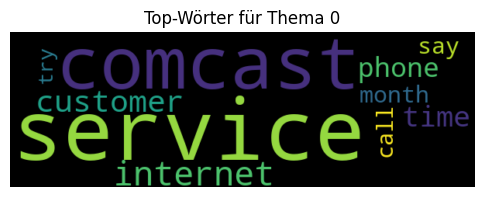

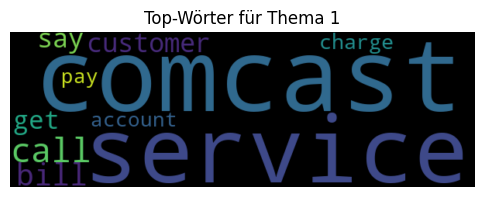

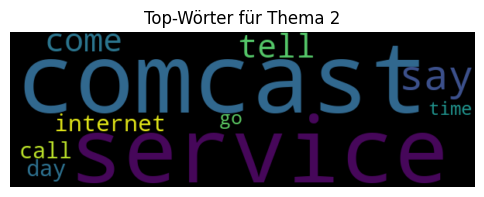

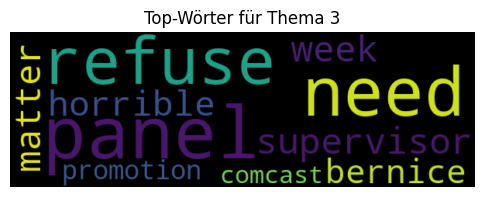

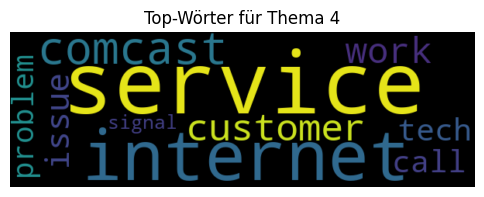

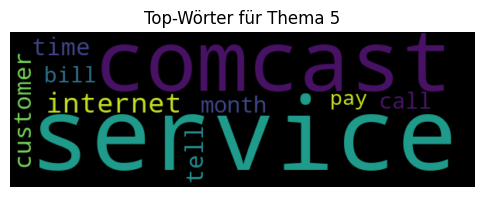

In [ ]:
# Visualisierung der Top-Wörter pro Thema aus dem LDA-Modell
from wordcloud import WordCloud
import matplotlib.pyplot as plt

num_topics = lda_model.num_topics           # Anzahl Themen (siehe LDA-Modell)
num_words = 10                              # Anzahl der Top-Wörter pro Thema


for topic_idx in range(num_topics):
    plt.figure(figsize=(6, 3))              # Größer der Wortwolke
    topic_terms = dict(lda_model.show_topic(topic_idx, topn=num_words))
    wc = WordCloud(width=600, height=200, background_color='black').generate_from_frequencies(topic_terms)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top-Wörter für Thema {topic_idx}")
    plt.show()

# Visualisierung der ustrukturierten Daten

## Visualisierung BERTopic
Nutzung modellspezifischer Visualisierungsmöglichkeiten zur weiterführenden Analyse.

topic_model.visualize_hierarchy() (https://maartengr.github.io/BERTopic/getting_started/visualization/visualization.html#visualize-probabilities-or-distribution)

<span style="color: red">Dieser Text ist rot.</span>
<span style="color: green">Dieser Text ist grün.</span>
<span style="color: grey">Dieser Text ist dunkelgrau.</span>
<span style="color: orange">Dieser Text ist orange.</span>
<span style="color: blue">Dieser Text ist blau.</span>
<span style="color: darkgrey">Dieser Text ist hellgrau.</span>

# Intertopic Distance Map

In [ ]:
# Intertopic Distance Map
bertopic_model.visualize_topics()

ValueError: This BERTopic instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
bertopic_model.get_topic(5)
#Return top n words for a specific topic and their c-TF-IDF scores.

[('modem', 0.15354457405255775),
 ('charge', 0.058110030430737154),
 ('comcast', 0.05678173728831675),
 ('buy', 0.04703386357454814),
 ('new', 0.04218685324041424),
 ('month', 0.03992209259102421),
 ('tell', 0.03809124959972199),
 ('send', 0.03414313466200921),
 ('work', 0.03347589602063093),
 ('call', 0.0332120020496058)]

In [ ]:
# Darstellung der Satzembeddings
bertopic_model.visualize_documents(docs=df2['text'].tolist(), embeddings=embeddings, topics=topics)

NameError: name 'topics' is not defined

In [ ]:
# Topic Word Scores

bertopic_model.visualize_barchart()
#Visualize a barchart of selected topics.
# Topic 0 ist ein Sammel-Topic für seltene Wörter, die in den anderen Topics nicht stark vertreten sind. Es enthält viele allgemeine Wörter, die in vielen Dokumenten vorkommen, aber nicht spezifisch für ein bestimmtes Thema sind.

ValueError: This BERTopic instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Topics per Class

bertopic_model.visualize_term_rank()
#Visualize the ranks of all terms across all topics.
# Each topic is represented by a set of words. These words, however, do not all equally represent the topic. This visualization shows how many words are needed to represent a topic and at which point the beneficial effect of adding words starts to decline.


ValueError: This BERTopic instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.